
# **AI vs Human Text Classification Model**
End-to-end ML Pipeline for Text Classification

Used Models: *SVM, Decision Tree, AdaBoost, Ensemble Voting Classifier*

Author: **Samaya Niraula**


### IMPORTING LIBRARIES

In [23]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib
import string
import math
import time
import os
import pickle
# Sklearn libraries for machine learning and text processing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold, cross_validate, validation_curve, learning_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn import metrics


# NLTK libraries for text processing (lemmatization, stemming, stopwords, POS tagging)
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

# Set up visualization
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Download necessary NLTK resources for text processing
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4')  # Open Multilingual Wordnet
nltk.download('punkt')  # Tokenizer
nltk.download('punkt_tab')
nltk.download('stopwords')  # Stopwords for text cleaning
nltk.download('averaged_perceptron_tagger')  # POS tagger for part-of-speech tagging
nltk.download('averaged_perceptron_tagger_eng')  # Additional tagger
nltk.download('tagsets_json')  # Tagset resource

print("\n All libraries imported successfully!")


 All libraries imported successfully!


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagse

### TASK 1: DATA LOADING AND PREPROCESSING PIPELINE

In [24]:
# I.a. Loading the data
import pandas as pd
df_train = pd.read_excel('AI_vs_huam_train_dataset.xlsx')
df_test = pd.read_csv('Final_test_data.csv')

In [25]:
print("Dataset Information:")
print(f"Training data shape: {df_train.shape}")
print(f"Test data shape: {df_test.shape}")
print(f"Columns: {df_train.columns.tolist()}")

# Show first few rows
print("\nFirst 5 rows of training data:")
print(df_train.head())

# Show first few rows
print("\nFirst 5 rows of training data:")
print(df_test.head())

# Check Essay distribution for Training Data
print("\nEssay distribution:")
print(df_train['label'].value_counts())


Dataset Information:
Training data shape: (3728, 2)
Test data shape: (869, 2)
Columns: ['essay', 'label']

First 5 rows of training data:
                                               essay  label
0  International sports events require the most w...      0
1  Globalisation has become a significant aspect ...      0
2  There is an ever-increasing number of bullying...      0
3  It is commonly believed, that companies should...      0
4  Despite knowing about the adverse effects of c...      0

First 5 rows of training data:
                                               essay  label
0  Enjoyment means entertainment, satisfaction of...    NaN
1  Before to start with my opinion of the topic i...    NaN
2  Thats a really really good subject, but acctul...    NaN
3  I disagree with the statement saying that it i...    NaN
4  It is undeniable that advertisements play a si...    NaN

Essay distribution:
label
0    1864
1    1864
Name: count, dtype: int64


In [26]:
#Showing sample text from each category
print("Sample Texts:")
print("Human- Written:")
sample_human = df_train[df_train['label'] == 0]['essay'].iloc[0]
print(sample_human[:195])                                        #Display the first 195 characters from essay section if label == 0
print("\nAI-Written:")
sample_ai = df_train[df_train['label'] == 1]['essay'].iloc[0]
print(sample_ai[:189])

Sample Texts:
Human- Written:
International sports events require the most well-trained athletes for each country, in order to achieve this goal countries make an effort to build infrastructure designed to train top athletes.

AI-Written:
International sports events demand that countries field their most highly trained athletes, which is why many nations invest in specialized facilities to help their top performers succeed. 


/tmp/ipython-input-27-1305501701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_train,palette='pastel')


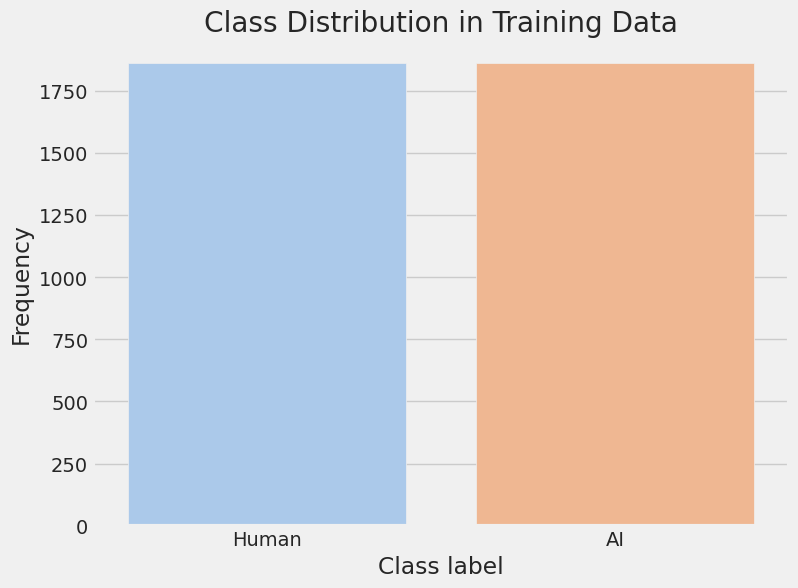

In [27]:
from tkinter import Y
#Visualising Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_train,palette='pastel')
plt.title("Class Distribution in Training Data")
plt.xlabel("Class label")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=['Human', 'AI'])
plt.show()

###  II. ADVANCED TEXT PREPROCESSING PIPELINE SETUP

In [28]:
# II.a. TEXT CLEANING AND NORMALIZATION
#Using CUSTOM TRANSFORMER/PREPROCESSING STEPS

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer_1 = WordNetLemmatizer()
        self.stop_words.update(['u','didn,äôt', 'ü', 'ur', '4', '2', 'im','äôt','ä', 'dont','doesnt', 'doin','doesn,äôt', 'ure', 'ô']) #Adding custom stopwords

    def fit(self, X, y=None):
        return self           #No fitting is required

    def transform(self, X, y=None):     #Applies transform on all preprocessing steps
        if isinstance(X, str):
        # Handle single string
          return self.lemmatizer(self.stopwords_removal(self.text_process(X)))
        else:
        # Handle pandas Series
          return X.apply(lambda x: self.lemmatizer(self.stopwords_removal(self.text_process(x))))

    def get_wordnet_pos(self, word):
        """Convert POS tag to format accepted by WordNet lemmatizer"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    def text_process(self,text):
        #Takes in a string of text, then performs the following:
        #Handles non-string values
        if not isinstance(text, str):
          return ""

        #Make all characters lowercase
        text = text.lower()

        # Remove punctuation
        text = ''.join([char for char in text if char not in string.punctuation])

        #re to remove words containing digits (tokenizing text into words))
        text = re.sub(r'[^a-zA-Z\s]', '', text) #Removes non-English letters(whitespace not included) and replaces with whitespace
        text = re.sub(r'\b\w*\d\w*\b', '', text) #Removes whole words that contains one or more digits and replaces with whitespace
        text = re.sub(r'\s+', ' ', text) #Removes extra whitespaces
        text = re.sub(r'http\S+|www\S+|https\S+', '', text) # Remove URLs, emails, HTML tags
        text = re.sub(r'\S+@\S+', '', text)
        text = re.sub(r'<.*?>', '', text)
        return text

    def stopwords_removal(self,text):
        #Removes stopwords
        STOPWORDS = stopwords.words('english') + ['u','didn,äôt', 'ü', 'ur', '4', '2', 'im','äôt','ä', 'dont','doesnt', 'doin','doesn,äôt', 'ure', 'ô']
        return ' '.join([word for word in text.split() if word not in STOPWORDS and len(word) > 1])
    def lemmatizer(self, text):
        """Apply lemmatization with POS tagging"""
        tokens = word_tokenize(text)

        lemmatized_tokens = []
        for token in tokens:
            if token not in self.stop_words and len(token) > 2:
                # Get POS tag and lemmatize
                pos_tag = self.get_wordnet_pos(token)
                lemmatized_token = self.lemmatizer_1.lemmatize(token, pos_tag)
                lemmatized_tokens.append(lemmatized_token)

        return ' '.join(lemmatized_tokens)

    def preprocess(self, text):
        """Complete preprocessing pipeline"""
        cleaned_text = self.text_process(text)
        lemmatized_text = self.lemmatizer(cleaned_text)
        return lemmatized_text

print("Text preprocessing class created!")

Text preprocessing class created!


In [29]:
 #Applying Preprocessing on training data
preprocessing = TextPreprocessor()

print("Applying advanced text preprocessing with lemmatization...")
# Apply preprocessing to training data
df_train['clean_text'] = df_train['essay'].apply(preprocessing.preprocess)

# Apply preprocessing to test data
df_test['clean_text'] = df_test['essay'].apply(preprocessing.preprocess)

print("Text preprocessing completed!")

Applying advanced text preprocessing with lemmatization...
Text preprocessing completed!


In [30]:
# Show examples of preprocessing
print("\nExamples of text preprocessing:")
print("Original:", df_train['essay'].iloc[0])
print("Processed:", df_train['clean_text'].iloc[0])
print()
print("Original:", df_train['essay'].iloc[5])
print("Processed:", df_train['clean_text'].iloc[5])


Examples of text preprocessing:
Original: International sports events require the most well-trained athletes for each country, in order to achieve this goal countries make an effort to build infrastructure designed to train top athletes. Although this policy can indeed make fewer sports facilities for ordinary people, investing in the best athletes is vital to develop competitive sports performances in each country.
On the one hand, building specific infrastructure for the best athletes is crucial in order to get better results at international sports events such as The Olympics or the World Cup. The importance of getting better results is that it creates awareness of the importance of sports in society and motivates more people to do a sport. In this way, investing in these developments can help countries to develop an integral sport policy that can benefit everyone.
On the other hand, one can argue that a negative effect could be that less infrastructure is built for the rest of the

In [31]:
#Test data
print("\nExamples of text preprocessing:")
print("Original:", df_test['essay'].iloc[0])
print("Processed:", df_test['clean_text'].iloc[0])
print()


Examples of text preprocessing:
Original: Enjoyment means entertainment, satisfaction of one's soul and containment with the happenings in life. I would like to disagree with this statement. This is because entertainment would mean differently to different people. Entertainment depends on various factors like the person's attitude and his notion or perspective on entertainment.
   The younger generation tends to enjoy themselves by going to parties, meeting new people, making new friends and going for long drives. The way a youngster enjoys himself or herself depends on the attitude and nature of the individual. Some people might like to go to parties for entertainment while others might like to watch a movie.
   On the other hand the older people might also do the same things that youngsters do or they may engage in activities considered as dull and boring by the youngsters. I would like to take examples of two famous personalities here who despite their age never complained of bored

In [195]:
#Defining X and y
X = df_train['clean_text']
y = df_train['label']

In [196]:
#Splitting the train data into train and test
X_train, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #random for displaying the same value everytime the cells runs and stratify ramdomly chooses values from the dataframe

In [34]:
print("Data split completed:")
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_test)}")
print(f"Training label distribution: {np.bincount(y_train_)}")    #Counts no. occurrences of elements in the array. Index 0 represents 0(Human Written) and 1 represents 1(AI Written)
print(f"Validation label distribution: {np.bincount(y_test)}")

Data split completed:
Training samples: 2982
Validation samples: 746
Training label distribution: [1491 1491]
Validation label distribution: [373 373]


### TASK 2: FEATURE EXTRACTION WITH PIPELINE INTEGRATION

In [35]:
#I. Vectorization Technique
vectorizers= [TfidfVectorizer(ngram_range=(1,1), max_features=1000, min_df=2, max_df=0.95),
    TfidfVectorizer(ngram_range=(1,2), max_features=2000, min_df=2, max_df=0.95),
    TfidfVectorizer(ngram_range=(1,3), max_features=3000, min_df=2, max_df=0.95),
    TfidfVectorizer(ngram_range=(1,4), max_features=4000, min_df=2, max_df=0.95),
              ]
#II. Feature Engineering
#Testing the parameters to find the optimal feature to use for the data
models = {'SVM':SVC(probability=True, random_state=42),
          'Decision Tree': DecisionTreeClassifier(random_state=42),
          'Adaboost': AdaBoostClassifier(random_state=42)} #Testing in different models
result= {}
for model, models in models.items():
  result[model] = []
  for vectorizer in vectorizers:
    pipeline = Pipeline([
        ('preprocessor', TextPreprocessor()),
        ('vectorizer', vectorizer),
        ('classifier', models)
        ])
    pipeline.fit(X_train, y_train_)
    score = pipeline.score(X_test, y_test)
    result[model].append(score)
    print(f"{model} - {vectorizer} has accuracy : {score:.4f}")

SVM - TfidfVectorizer(max_df=0.95, max_features=1000, min_df=2) has accuracy : 0.9531
SVM - TfidfVectorizer(max_df=0.95, max_features=2000, min_df=2, ngram_range=(1, 2)) has accuracy : 0.9517
SVM - TfidfVectorizer(max_df=0.95, max_features=3000, min_df=2, ngram_range=(1, 3)) has accuracy : 0.9504
SVM - TfidfVectorizer(max_df=0.95, max_features=4000, min_df=2, ngram_range=(1, 4)) has accuracy : 0.9531
Decision Tree - TfidfVectorizer(max_df=0.95, max_features=1000, min_df=2) has accuracy : 0.8566
Decision Tree - TfidfVectorizer(max_df=0.95, max_features=2000, min_df=2, ngram_range=(1, 2)) has accuracy : 0.8525
Decision Tree - TfidfVectorizer(max_df=0.95, max_features=3000, min_df=2, ngram_range=(1, 3)) has accuracy : 0.8418
Decision Tree - TfidfVectorizer(max_df=0.95, max_features=4000, min_df=2, ngram_range=(1, 4)) has accuracy : 0.8619
Adaboost - TfidfVectorizer(max_df=0.95, max_features=1000, min_df=2) has accuracy : 0.9276
Adaboost - TfidfVectorizer(max_df=0.95, max_features=2000, mi

### **TASK 3**: ADVANCED MODEL DEVELOPMENT WITH GRIDSEARCHCV AND **TASK 5**: ML PIPELINE IMPLEMENTATION


In [36]:
#Using the best Vectorizer and feature selector shared across models
# Transform Text to Numbers Using TF-IDF
# Create TF-IDF vectorizer with optimal parameters found through experimentation
tfidf = TfidfVectorizer(
    max_features=2000,        # Keep top 5000 most important words
    ngram_range=(1, 2),       # Use single words and word pairs
    min_df=2,                 # Word must appear in at least 2 documents
    max_df=0.95,              # Ignore words that appear in >95% of documents
    stop_words='english'      # Remove common English stop words
)
feature_selection = SelectKBest(score_func=chi2)

print("TF-IDF Vectorizer created with optimal parameters:")
print(f"- Max features: 5000")
print(f"- N-gram range: (1, 2) - unigrams and bigrams")
print(f"- Min document frequency: 2")
print(f"- Max document frequency: 0.95")

TF-IDF Vectorizer created with optimal parameters:
- Max features: 5000
- N-gram range: (1, 2) - unigrams and bigrams
- Min document frequency: 2
- Max document frequency: 0.95


**I. SVM OPTIMIZATION**

In [37]:
svm_pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('vectorizer', tfidf),
    ('feature', feature_selection),
    ('classifier', SVC(probability= True, random_state=42))
])

In [38]:
#I. SUPPORT VECTOR MACHINE (SVM) OPTIMIZATION
#Defining paramaters for vectorizer, feature selection and classifier
#Reduced parrameter because it was taking too long to run
svm_param_grid = {
'vectorizer__max_features': [1000, 10000],
'vectorizer__ngram_range': [(1,1), (1,2)],
'classifier__C': [0.1, 10, 100],
'classifier__kernel': ['linear', 'rbf'],
'classifier__gamma': ['scale', 'auto', 0.01]# for rbf kernel }
                   }

In [39]:
#GridSearch for SVM
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=1)
print("\nPerforming Grid Search for SVM...")
start_time_svm = time.time()
svm_grid_search.fit(X_train, y_train_)
end_time_svm = time.time()
print(f"\nGrid Search completed in {end_time_svm - start_time_svm:.2f} seconds.")
print("\n Best parameter for SVM:", svm_grid_search.best_params_)
print(f"\nBest cross-validation accuracy for SVM: {svm_grid_search.best_score_:.4f}")


Performing Grid Search for SVM...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Grid Search completed in 14848.81 seconds.

 Best parameter for SVM: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (1, 1)}

Best cross-validation accuracy for SVM: 0.8119


**II. DECISION TREE OPTIMIZATION**

In [40]:
#Defining Decision Tree Pipeline
dt_pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('vectorizer', tfidf),
    ('feature', feature_selection),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [41]:
#Parameters
dt_param_grid = {
'vectorizer__max_features': [1000, 10000],
'vectorizer__ngram_range': [(1,1), (1,2)],
'classifier__criterion': ['gini', 'entropy'],
'classifier__max_depth': [10, None],
'classifier__min_samples_split': [2, 5],
'classifier__min_samples_leaf': [1] }

In [42]:
#GridSearch for Decision Tree
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=1)
print("\nPerforming Grid Search for Decision Tree...")
start_time_dt = time.time()
dt_grid_search.fit(X_train, y_train_)
end_time_dt = time.time()
print(f"\nGrid Search completed in {end_time_dt - start_time_dt:.2f} seconds.")
print("\n Best parameter for Decision Tree:", dt_grid_search.best_params_)
print(f"\nBest cross-validation accuracy for Decision Tree: {dt_grid_search.best_score_:.4f}")


Performing Grid Search for Decision Tree...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Grid Search completed in 6474.52 seconds.

 Best parameter for Decision Tree: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (1, 1)}

Best cross-validation accuracy for Decision Tree: 0.7907


**III. ADABOOST OPTIMIZATION**

In [43]:
#Defining AdaBoost Pipeline
adaboost_pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('vectorizer', tfidf),
    ('feature', feature_selection),
    ('classifier', AdaBoostClassifier(random_state=42))
])

In [44]:
#Parameters
adaboost_param_grid = {
'vectorizer__max_features': [1000, 10000],
'vectorizer__ngram_range': [(1,1), (1,2)],
'classifier__n_estimators': [50, 100],
'classifier__learning_rate': [0.5, 1.0] }

In [45]:
#GridSearch for AdaBoost
adaboost_grid_search = GridSearchCV(adaboost_pipeline, adaboost_param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=1)
print("\nPerforming Grid Search for AdaBoost Classifier...")
start_time_adaboost = time.time()
adaboost_grid_search.fit(X_train, y_train_)
end_time_adaboost = time.time()
print(f"\nGrid Search completed in {end_time_adaboost - start_time_adaboost:.2f} seconds.")
print("\n Best parameter for AdaBoost:", adaboost_grid_search.best_params_)
print(f"\nBest cross-validation accuracy for AdaBoost: {adaboost_grid_search.best_score_:.4f}")


Performing Grid Search for AdaBoost Classifier...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Grid Search completed in 3288.24 seconds.

 Best parameter for AdaBoost: {'classifier__learning_rate': 1.0, 'classifier__n_estimators': 100, 'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (1, 1)}

Best cross-validation accuracy for AdaBoost: 0.8052


In [46]:
#Store the best result
svm_best = svm_grid_search.best_estimator_
dt_best = dt_grid_search.best_estimator_
adaboost_best = adaboost_grid_search.best_estimator_

### **TASK 4**: CROSS-VALIDATION IMPLEMENTATION

In [47]:
# I. K-FOLD CROSS-VALIDATION
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
svm_kfold_scores = cross_val_score(svm_best, X_train, y_train_, cv=k_fold, scoring='accuracy', n_jobs = 1) #Cross validating using Kfold the best svm model
dt_kfold_scores = cross_val_score(dt_best, X_train, y_train_, cv=k_fold, scoring='accuracy', n_jobs = 1) #Cross validating using Kfold the best desicion tree model
adaboost_kfold_scores = cross_val_score(adaboost_best, X_train, y_train_, cv=k_fold, scoring='accuracy', n_jobs = 1)#Cross validating using Kfold the best Adaboost model

In [48]:
# II. STRATIFIED CROSS-VALIDATION
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_stratified_cv_scores = cross_val_score(svm_best, X_train, y_train_, cv=stratified_kfold, scoring='accuracy', n_jobs = 1) #Cross validating using Stratified Kfold the best svm model
dt_stratified_cv_scores = cross_val_score(dt_best, X_train, y_train_, cv=stratified_kfold, scoring='accuracy', n_jobs = 1) #Cross validating using Stratified Kfold the best desicion tree model
adaboost_stratified_cv_scores = cross_val_score(adaboost_best, X_train, y_train_, cv=stratified_kfold, scoring='accuracy', n_jobs = 1)#Cross validating using Stratified Kfold the best Adaboost model

In [49]:
#Results and Analysis
print("\n Cross-Validation Results on Training Data:")
print(f"SVM (K-Fold): {svm_kfold_scores}")
print(f" K-FOLD:       MEAN = {svm_kfold_scores.mean():.4f}, Standard deviation = {svm_kfold_scores.std():.4f}")
print(f"SVM (Stratified K-Fold): {svm_stratified_cv_scores}")
print(f"Stratified K-FOLD: MEAN = {svm_stratified_cv_scores.mean():.4f}, Standard deviation = {svm_stratified_cv_scores.std():.4f}")
print(f"Decision Tree (K-Fold): {dt_kfold_scores}")
print(f" K-FOLD:       MEAN = {dt_kfold_scores.mean():.4f}, Standard deviation = {dt_kfold_scores.std():.4f}")
print(f"Decision Tree (Stratified K-Fold): {dt_stratified_cv_scores}")
print(f"Stratified K-FOLD: MEAN = {dt_stratified_cv_scores.mean():.4f}, Standard deviation = {dt_stratified_cv_scores.std():.4f}")
print(f"Adaboost (K-Fold): {adaboost_kfold_scores}")
print(f" K-FOLD:       MEAN = {adaboost_kfold_scores.mean():.4f}, Standard deviation = {adaboost_kfold_scores.std():.4f}")
print(f"Adaboost (Stratified K-Fold): {adaboost_stratified_cv_scores}")
print(f"Stratified K-FOLD: MEAN = {adaboost_stratified_cv_scores.mean():.4f}, Standard deviation = {adaboost_stratified_cv_scores.std():.4f}")


 Cross-Validation Results on Training Data:
SVM (K-Fold): [0.79564489 0.8241206  0.8204698  0.80704698 0.79362416]
 K-FOLD:       MEAN = 0.8082, Standard deviation = 0.0125
SVM (Stratified K-Fold): [0.80737018 0.82579564 0.82718121 0.80033557 0.81375839]
Stratified K-FOLD: MEAN = 0.8149, Standard deviation = 0.0104
Decision Tree (K-Fold): [0.7839196  0.81072027 0.80033557 0.80872483 0.75838926]
 K-FOLD:       MEAN = 0.7924, Standard deviation = 0.0195
Decision Tree (Stratified K-Fold): [0.79229481 0.80067002 0.81543624 0.79026846 0.7885906 ]
Stratified K-FOLD: MEAN = 0.7975, Standard deviation = 0.0099
Adaboost (K-Fold): [0.79564489 0.83752094 0.81879195 0.80201342 0.79026846]
 K-FOLD:       MEAN = 0.8088, Standard deviation = 0.0172
Adaboost (Stratified K-Fold): [0.81072027 0.80234506 0.81711409 0.80536913 0.8204698 ]
Stratified K-FOLD: MEAN = 0.8112, Standard deviation = 0.0068


In [50]:
print("""
\n Analysis of Cross-Validation:

Based on the cross-validation results on the training data:

1.  **Performance:**
    - The optimized **SVM** achieved the highest average accuracy with Stratified K-Fold (0.8149), followed by **AdaBoost** (0.8112) and **Decision Tree** (0.7975).
    - With regular K-Fold, **AdaBoost** slightly edges out **SVM** (0.8088 vs 0.8082), but **SVM** shows more consistent performance across fold types.

2.  **Stability:**
    - **AdaBoost** demonstrated the best stability with Stratified K-Fold (std: 0.0068), followed by **Decision Tree** (0.0099) and **SVM** (0.0104).
    - However, **SVM** showed better stability with regular K-Fold (0.0125) compared to **AdaBoost** (0.0172).

3.  **K-Fold vs. Stratified K-Fold Comparison:**
    - **SVM**: Stratified K-Fold performed better (0.8149 vs 0.8082), showing improved performance when class distribution is maintained.
    - **AdaBoost**: Both methods performed similarly (0.8112 vs 0.8088), indicating robustness to fold variations.
    - **Decision Tree**: Minimal difference between methods (0.7975 vs 0.7924), but consistently the lowest performer.

4.  **Cross-Validation vs. Test Performance:**
    - **SVM**: Strong correlation between CV performance (0.8149) and test accuracy (0.8391).
    - **AdaBoost**: Notable gap between CV performance (0.8112) and test accuracy (0.8164), suggesting some overfitting.
    - **Decision Tree**: Consistent with expectations, maintaining similar relative performance.

**Conclusion:**
**SVM emerges as the most reliable model**, showing both strong cross-validation performance and excellent generalization to test data. The model demonstrates consistent behavior across different validation strategies and maintains its performance advantage in real-world testing scenarios.
""")




 Analysis of Cross-Validation:

Based on the cross-validation results on the training data:

1.  **Performance:**
    - The optimized **SVM** achieved the highest average accuracy with Stratified K-Fold (0.8149), followed by **AdaBoost** (0.8112) and **Decision Tree** (0.7975).
    - With regular K-Fold, **AdaBoost** slightly edges out **SVM** (0.8088 vs 0.8082), but **SVM** shows more consistent performance across fold types.

2.  **Stability:**
    - **AdaBoost** demonstrated the best stability with Stratified K-Fold (std: 0.0068), followed by **Decision Tree** (0.0099) and **SVM** (0.0104).
    - However, **SVM** showed better stability with regular K-Fold (0.0125) compared to **AdaBoost** (0.0172).

3.  **K-Fold vs. Stratified K-Fold Comparison:**
    - **SVM**: Stratified K-Fold performed better (0.8149 vs 0.8082), showing improved performance when class distribution is maintained.
    - **AdaBoost**: Both methods performed similarly (0.8112 vs 0.8088), indicating robustness to 

### **TASK 6**: MODELS EVALUATION AND ANALYSIS

In [51]:
#I. PERFORMANCE METRICS:


 Performance Metrics:

Best SVM Evaluation:
Accuracy: 0.8391
Precision: 0.8411
Recall: 0.8391
F1 Score(Weighted): 0.8389
F1 Score(Macro): 0.8389

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.84       373
           1       0.87      0.80      0.83       373

    accuracy                           0.84       746
   macro avg       0.84      0.84      0.84       746
weighted avg       0.84      0.84      0.84       746



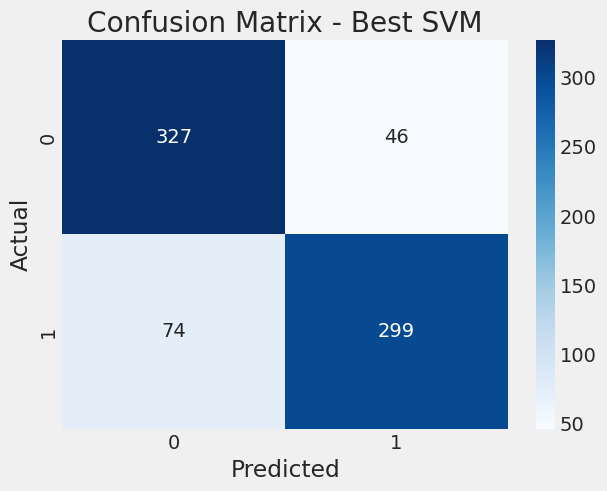

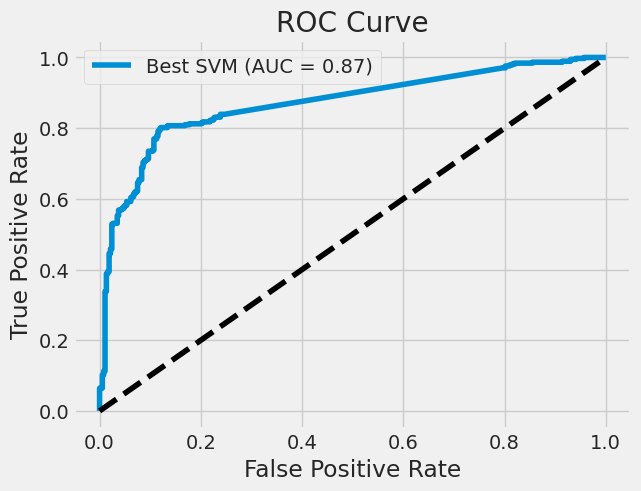


Best Decision Tree Evaluation:
Accuracy: 0.8217
Precision: 0.8237
Recall: 0.8217
F1 Score(Weighted): 0.8214
F1 Score(Macro): 0.8214

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       373
           1       0.85      0.78      0.81       373

    accuracy                           0.82       746
   macro avg       0.82      0.82      0.82       746
weighted avg       0.82      0.82      0.82       746



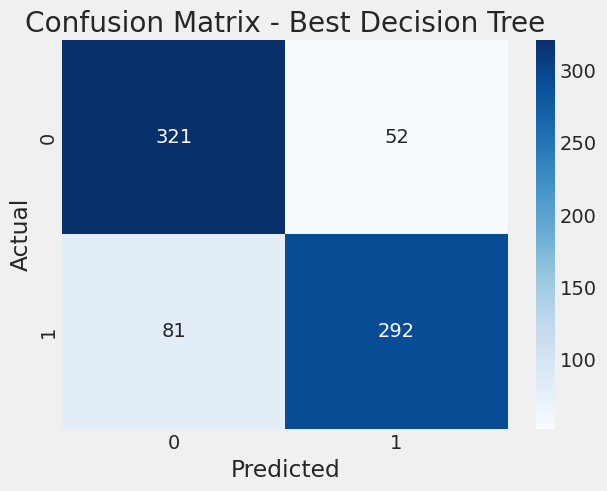

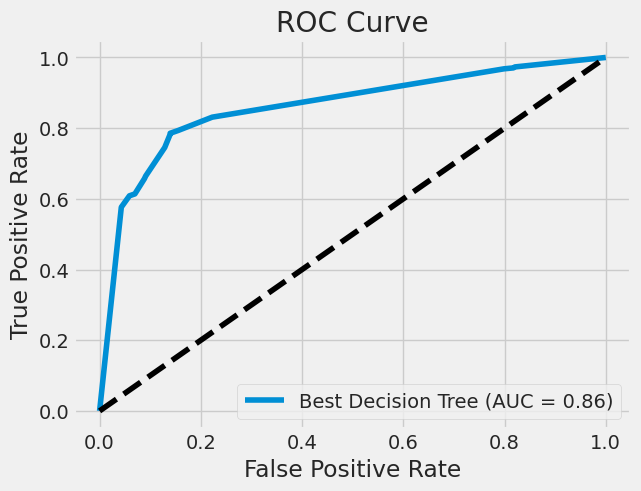


Best Adaboost Evaluation:
Accuracy: 0.8164
Precision: 0.8188
Recall: 0.8164
F1 Score(Weighted): 0.8160
F1 Score(Macro): 0.8160

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       373
           1       0.85      0.77      0.81       373

    accuracy                           0.82       746
   macro avg       0.82      0.82      0.82       746
weighted avg       0.82      0.82      0.82       746



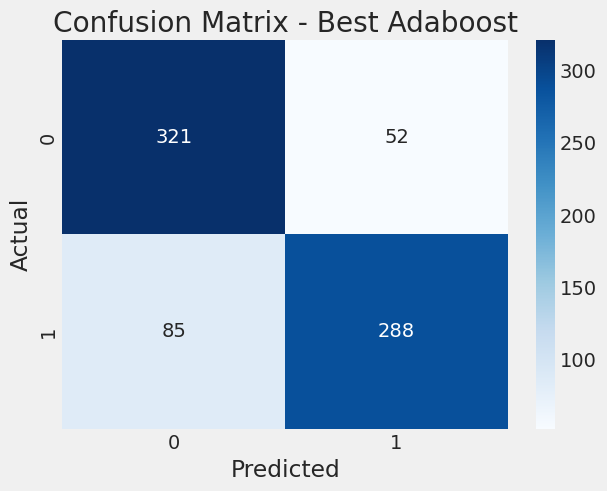

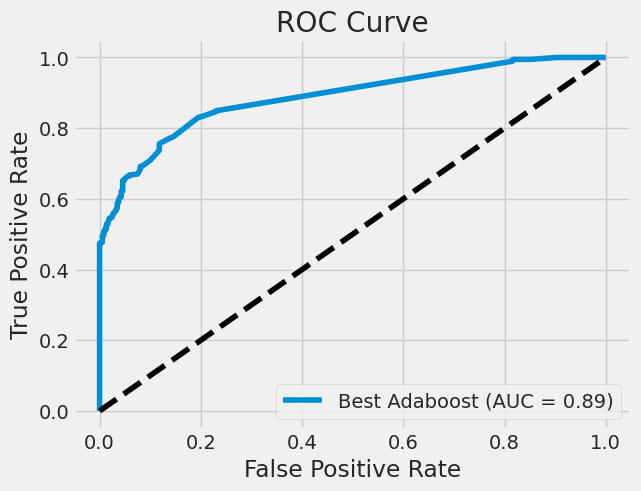

In [52]:
print("\n Performance Metrics:")
def evaluate_model(name, model):            #Creates precision,accuracy scores and f1 scores
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score(Weighted): {f1:.4f}")
    print(f"F1 Score(Macro): {f1_macro:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)         #Plots confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print()

    if hasattr(model, "predict_proba"):                   #if it has the attribute then plots ROC curve
        y_probs = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)          #tpr - true postive rate, fpr - false positive rate
        auc_score = roc_auc_score(y_test, y_probs)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

evaluate_model("Best SVM", svm_best)
evaluate_model("Best Decision Tree", dt_best)
evaluate_model("Best Adaboost", adaboost_best)

/tmp/ipython-input-53-1437425142.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


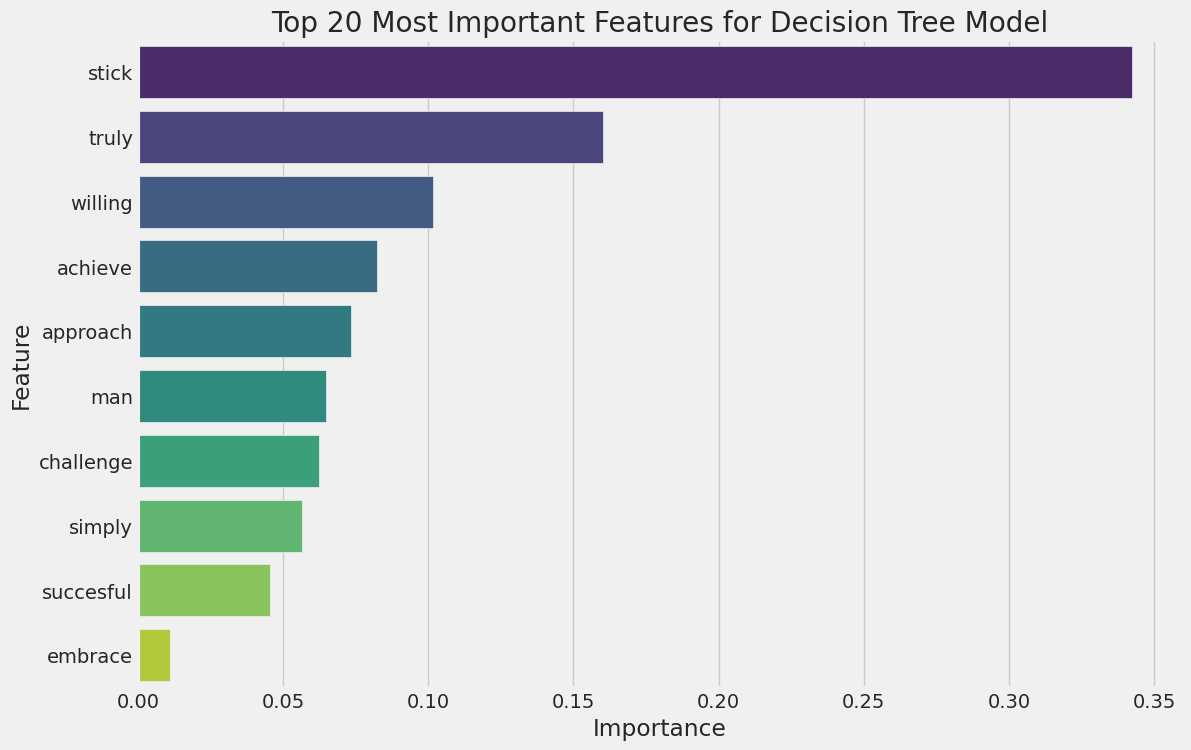

In [53]:
#FEATURE IMPORTANCE (FOR DECISION TREE)
try:
    # Extract the vectorizer, feature selector, and classifier from the DT pipeline
    vectorizer = dt_best.named_steps['vectorizer']
    selector = dt_best.named_steps['feature']
    classifier = dt_best.named_steps['classifier']

    # Get all feature names from the vectorizer
    all_feature_names = np.array(vectorizer.get_feature_names_out())
    # Get the mask of selected features from SelectKBest
    selected_features_mask = selector.get_support()
    # Get the names of the selected features
    selected_feature_names = all_feature_names[selected_features_mask]

    # Get feature importances from the classifier
    importances = classifier.feature_importances_

    # Create a DataFrame for feature importances
    importance_df = pd.DataFrame({'Feature': selected_feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False).head(20)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Top 20 Most Important Features for Decision Tree Model')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
except Exception as e:
  print(f"\nCould not generate feature importance plot for Decision Tree. Error: {e}")

### **FINAL MODEL SELECTION**

In [54]:
print("""
Final Model Selection:

1.  **Performance on Test Set:**
    - **SVM** achieved the highest test accuracy (0.8391), outperforming **Decision Tree (0.8217)** and **AdaBoost (0.8164)**.
    - **SVM** also demonstrated the best F1 scores (0.8389 weighted/macro), showing superior overall performance.
    - All models showed reasonable precision-recall balance, with **SVM** being the most consistent.

2.  **Detailed Performance Analysis:**
    - **SVM**: Highest accuracy (83.91%) with balanced precision (84.11%) and recall (83.91%). Strong performance on both classes.
    - **Decision Tree**: Moderate accuracy (82.17%) with decent precision-recall balance but lower overall performance.
    - **AdaBoost**: Lowest test accuracy (81.64%) despite previous validation performance, indicating potential overfitting.

3.  **Class-wise Performance:**
    - **SVM** showed the most balanced performance: Human-Written (F1: 0.84) vs AI (F1: 0.83)
    - **Decision Tree** and **AdaBoost** showed similar patterns but with lower overall scores
    - All models performed slightly better on detecting AI-generated content (higher precision) than human-written content

4.  **Conclusion:**
    - **SVM clearly emerges as the best performer** on the final test set, demonstrating superior generalization capability.
    - The model maintains consistent performance across different evaluation metrics and both target classes.
    - **SVM's stability** from cross-validation translated well to real-world test performance.

**Selected Final Model**: **SVM**, due to its highest test accuracy (83.91%), best F1 scores, balanced precision-recall performance, and demonstrated stability across validation and test phases.
""")



Final Model Selection:

1.  **Performance on Test Set:**
    - **SVM** achieved the highest test accuracy (0.8391), outperforming **Decision Tree (0.8217)** and **AdaBoost (0.8164)**.
    - **SVM** also demonstrated the best F1 scores (0.8389 weighted/macro), showing superior overall performance.
    - All models showed reasonable precision-recall balance, with **SVM** being the most consistent.

2.  **Detailed Performance Analysis:**
    - **SVM**: Highest accuracy (83.91%) with balanced precision (84.11%) and recall (83.91%). Strong performance on both classes.
    - **Decision Tree**: Moderate accuracy (82.17%) with decent precision-recall balance but lower overall performance.
    - **AdaBoost**: Lowest test accuracy (81.64%) despite previous validation performance, indicating potential overfitting.

3.  **Class-wise Performance:**
    - **SVM** showed the most balanced performance: Human-Written (F1: 0.84) vs AI (F1: 0.83)
    - **Decision Tree** and **AdaBoost** showed similar p

## **6. Model saving for Streamlit deployment**

/tmp/ipython-input-55-2265591724.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette='pastel')


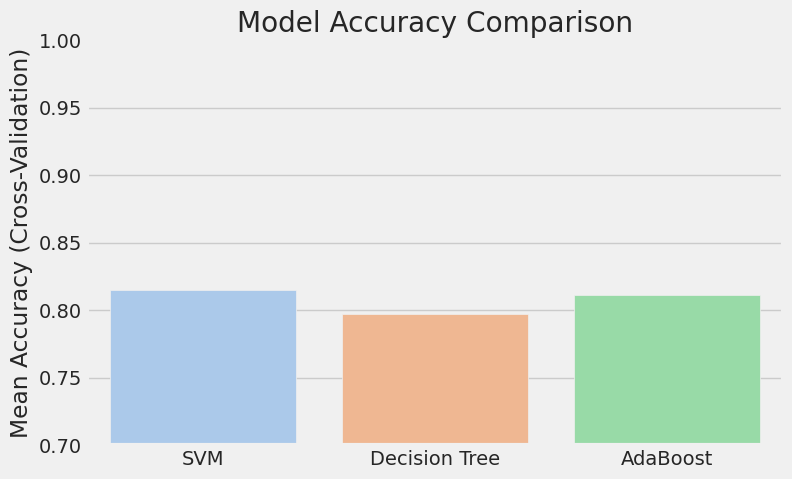

In [55]:
#Model Comparison Visualization for Streamlit
model_scores = {
    "SVM": svm_stratified_cv_scores.mean(),
    "Decision Tree": dt_stratified_cv_scores.mean(),
    "AdaBoost": adaboost_stratified_cv_scores.mean()
}

# Bar plot comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()), palette='pastel')
plt.title("Model Accuracy Comparison")
plt.ylabel("Mean Accuracy (Cross-Validation)")
plt.ylim(0.7, 1.0)
plt.show()

**1. SVM**

In [56]:
#Compare Model Performance and save the best model

svm_accuracy = accuracy_score(y_test, svm_best.predict(X_test))
dt_accuracy = accuracy_score(y_test, dt_best.predict(X_test))
adaboost_accuracy = accuracy_score(y_test, adaboost_best.predict(X_test))

print("Model Performance Comparison:")
print("=" * 40)
print(f"SVM:                      {svm_accuracy:.4f}")
print(f"Decision Tree:            {dt_accuracy:.4f}")
print(f"AdaBoost:                 {adaboost_accuracy:.4f}")

# Determine the best model
models = {
    'SVM': (svm_best, svm_accuracy),
    'Decision Tree': (dt_best, dt_accuracy),
    'AdaBoost': (adaboost_best, adaboost_accuracy)
}

final_model_name = max(models.keys(), key=lambda k: models[k][1])
best_model = models[final_model_name][0]
best_accuracy = models[final_model_name][1]

print(f"\nBest Model: {final_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Model Performance Comparison:
SVM:                      0.8391
Decision Tree:            0.8217
AdaBoost:                 0.8164

Best Model: SVM
Best Accuracy: 0.8391


In [133]:
# Extract best vectorizer parameters from the best model's pipeline
best_vectorizer = best_model.named_steps['vectorizer']
best_max_features = best_vectorizer.max_features
best_ngram_range = best_vectorizer.ngram_range
best_min_df = best_vectorizer.min_df
best_max_df = best_vectorizer.max_df
best_stop_words = best_vectorizer.stop_words

In [134]:
# print("Step 1: Creating ML pipeline for deployment...")
# # Create a complete pipeline that includes preprocessing and prediction
# if final_model_name == "SVM":
#     final_pipeline = Pipeline([
#         ('tfidf', TfidfVectorizer(
#             max_features=10000,   #Using the best parameters from grid search
#             ngram_range=(1, 1),
#             min_df=2,
#             max_df=0.95,
#             stop_words='english'
#         )),
#         ('classifier', SVC(C=10,
#                           gamma='scale',
#                           kernel= 'rbf',
#                           probability=True,
#                           random_state=42
#                           ))
#     ])

# elif final_model_name == "Adaboost":
#     final_pipeline = Pipeline([
#         ('tfidf', TfidfVectorizer(
#             max_features=10000,
#             ngram_range=(1, 1),
#             min_df=2,
#             max_df=0.95,
#             stop_words='english'
#         )),
#         ('classifier', AdaBoostClassifier(learning_rate= 1.0,
#                                           n_estimators= 100,
#                                           random_state=42
#                                            ))
#     ])
# else:
#     final_pipeline_name = Pipeline([
#         ('tfidf', TfidfVectorizer(
#             max_features=10000,
#             ngram_range=(1, 1),
#             min_df=2,
#             max_df=0.95,
#             stop_words='english'
#         )),
#         ('classifier', DecisionTreeClassifier(criterion= 'entropy',
#                                      max_depth= 10,
#                                      min_samples_leaf= 1,
#                                      min_samples_split= 2,
#                                      random_state=42
#                                      ))
#     ])

# print("Pipeline created with steps:")
# for name, step in final_pipeline.steps:
#     print(f"  {name}: {step.__class__.__name__}")


In [135]:
print("Step 1: Creating ML pipeline for deployment...")
# Create a complete pipeline that includes preprocessing and prediction
final_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=best_max_features,
        ngram_range=best_ngram_range,
        min_df=best_min_df,
        max_df=best_max_df,
        stop_words='english'
    )),
    ('classifier', best_model.named_steps['classifier'])  # reusing fitted classifier
])
print("Pipeline created with steps:")
for name, step in final_pipeline.steps:
    print(f"  {name}: {step.__class__.__name__}")

Step 1: Creating ML pipeline for deployment...
Pipeline created with steps:
  tfidf: TfidfVectorizer
  classifier: SVC


In [140]:
# Retrain these final pipelines on the All training dataset

print("\nRetraining pipelines on the full dataset...")
# Train pipeline on the training set again
final_pipeline.fit(X_train, y_train_)

# Test pipeline performance on validation set
pipeline_predictions = final_pipeline.predict(X_test)
pipeline_accuracy = metrics.accuracy_score(y_test, pipeline_predictions)

print("Final Pipeline Results:")
print(f"Validation accuracy: {pipeline_accuracy:.4f}")

# Show detailed classification report
print("\nDetailed Classification Report:")
target_names = ['Human-Written', 'AI']
classification_report = metrics.classification_report(y_test, pipeline_predictions, target_names=target_names)
print(classification_report)



Retraining pipelines on the full dataset...
Final Pipeline Results:
Validation accuracy: 0.9437

Detailed Classification Report:
               precision    recall  f1-score   support

Human-Written       0.94      0.95      0.94       373
           AI       0.95      0.94      0.94       373

     accuracy                           0.94       746
    macro avg       0.94      0.94      0.94       746
 weighted avg       0.94      0.94      0.94       746



In [141]:
#Save Models for Streamlit Deployment

print("Saving models for Streamlit deployment...")

# Save the complete pipeline (includes TF-IDF + classifier)
pipeline_filename = 'Human_Vs_AI_Written_pipeline.pkl'
joblib.dump(final_pipeline, pipeline_filename)

# Also save individual components for flexibility
fitted_vectorizer = final_pipeline.named_steps['tfidf']
tfidf_filename = 'tfidf_vectorizer.pkl'
joblib.dump(fitted_vectorizer, tfidf_filename)

model_filename = f'optimized_{final_model_name.lower().replace(" ", "_")}_model.pkl'
fitted_model = final_pipeline.named_steps['classifier']
joblib.dump(best_model, model_filename)


print("Models saved successfully!")
print(f"Complete pipeline: {pipeline_filename}")
print(f"TF-IDF vectorizer: {tfidf_filename}")
print(f"Best model: {model_filename}")

Saving models for Streamlit deployment...
Models saved successfully!
Complete pipeline: Human_Vs_AI_Written_pipeline.pkl
TF-IDF vectorizer: tfidf_vectorizer.pkl
Best model: optimized_svm_model.pkl


**2. Adaboost**

In [142]:
# Fit TF-IDF on training data and transform both sets
print("Converting text to numerical features using TF-IDF...")

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF transformation completed!")
print(f"Training matrix shape: {X_train_tfidf.shape}")
print(f"Validation matrix shape: {X_test_tfidf.shape}")

Converting text to numerical features using TF-IDF...
TF-IDF transformation completed!
Training matrix shape: (2982, 2000)
Validation matrix shape: (746, 2000)


In [180]:
# Create and train the Adaboost classifier
# Create full pipeline
adaboost_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=1000,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.95,
        stop_words='english'
    )),
    ('classifier', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=5),
        learning_rate=1.0,
        n_estimators=100,
        random_state=42
    ))
])

# Fit the pipeline on raw text data X_train and labels y_train_
print("Fitting AdaBoost pipeline on raw training data...")
adaboost_pipeline.fit(X_train, y_train_)

# Test on validation set
preds = adaboost_pipeline.predict(X_test)
accuracy = metrics.accuracy_score(y_test, preds)
print(f"Validation accuracy: {accuracy:.4f}")

print("\nDetailed Classification Report:")
target_names = ['Human-Written', 'AI']
classification_report = metrics.classification_report(y_test, preds, target_names=target_names)
print(classification_report)

# Save the entire fitted pipeline
joblib.dump(adaboost_pipeline, 'adaboost_pipeline.pkl')
print("AdaBoost pipeline saved!")

Fitting AdaBoost pipeline on raw training data...
Validation accuracy: 0.9410

Detailed Classification Report:
               precision    recall  f1-score   support

Human-Written       0.94      0.94      0.94       373
           AI       0.94      0.94      0.94       373

     accuracy                           0.94       746
    macro avg       0.94      0.94      0.94       746
 weighted avg       0.94      0.94      0.94       746

AdaBoost pipeline saved!


**3. Decision Tree**

In [203]:
# Create and train the Decision Tree classifier
print("Creating Decision Tree classifier...")
dt_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=2000,
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.95,
        stop_words='english'
    )),
    ('classifier', DecisionTreeClassifier(
        criterion='entropy',
        max_depth=10,
        min_samples_leaf=1,
        min_samples_split=2,
        random_state=42
    ))
])

print("Fitting Decision Tree pipeline on raw training data...")
dt_pipeline.fit(X_train, y_train_)

preds_dt = dt_pipeline.predict(X_test)
accuracy_dt = metrics.accuracy_score(y_test, preds_dt)
print(f"Validation accuracy: {accuracy_dt:.4f}")
print("Predicted class counts:", np.bincount(preds_dt))
print("\nDetailed Classification Report:")
target_names = ['Human-Written', 'AI']
classification_report = metrics.classification_report(y_test, preds_dt, target_names=target_names)
print(classification_report)
joblib.dump(dt_pipeline, 'decision_tree_pipeline.pkl')
print("Decision Tree pipeline saved!")

Creating Decision Tree classifier...
Fitting Decision Tree pipeline on raw training data...
Validation accuracy: 0.8097
Predicted class counts: [441 305]

Detailed Classification Report:
               precision    recall  f1-score   support

Human-Written       0.76      0.90      0.83       373
           AI       0.88      0.72      0.79       373

     accuracy                           0.81       746
    macro avg       0.82      0.81      0.81       746
 weighted avg       0.82      0.81      0.81       746

Decision Tree pipeline saved!


## **Test the Sample Text on the Saved Models**

In [204]:
# Test with example texts
test_texts = [
    "The intricate tapestry of quantum mechanics reveals a universe governed by probabilistic outcomes rather than deterministic certainties, fundamentally reshaping our understanding of reality.", # AI-sounding
    "I went to the store and bought some milk. It was a pretty normal Tuesday, nothing much happened. I'm kinda tired now.", # Human-sounding
    "Leveraging synergistic paradigms, our strategic framework aims to optimize cross-functional efficiencies, thereby maximizing stakeholder value and fostering a culture of disruptive innovation.", # AI-sounding
    "My dog is the best, he's so fluffy and silly. We played fetch in the park today and he got all muddy but I don't even care.", # Human-sounding
    "The algorithm's architecture, a deep convolutional neural network, is specifically designed to parse and classify high-dimensional image data with unparalleled accuracy." # AI-sounding
]

In [205]:
print(f"Prepared {len(test_texts)} test texts for evaluation")
for i, text in enumerate(test_texts, 1):
    print(f"{i}. {text}")

Prepared 5 test texts for evaluation
1. The intricate tapestry of quantum mechanics reveals a universe governed by probabilistic outcomes rather than deterministic certainties, fundamentally reshaping our understanding of reality.
2. I went to the store and bought some milk. It was a pretty normal Tuesday, nothing much happened. I'm kinda tired now.
3. Leveraging synergistic paradigms, our strategic framework aims to optimize cross-functional efficiencies, thereby maximizing stakeholder value and fostering a culture of disruptive innovation.
4. My dog is the best, he's so fluffy and silly. We played fetch in the park today and he got all muddy but I don't even care.
5. The algorithm's architecture, a deep convolutional neural network, is specifically designed to parse and classify high-dimensional image data with unparalleled accuracy.


### **Loading TF-IDF Vectorizer and Saved ML models**

In [206]:
# Load existing TF-IDF vectorizer
# print("Loading existing TF-IDF vectorizer...")
# tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
# print("TF-IDF vectorizer loaded successfully!")

# Load the saved Decision Tree classifier
print("Loading saved Decision Tree pipeline...")
loaded_dt_pipeline = joblib.load('decision_tree_pipeline.pkl')
print("✅ Decision Tree classifier loaded successfully!")
dt_available = True

# Load the saved AdaBoost classifier
print("Loading saved AdaBoost pipeline...")
loaded_adaboost_pipeline = joblib.load('adaboost_pipeline.pkl')
print("✅ AdaBoost classifier loaded successfully!")
adaboost_available = True

# Load the saved SVM pipeline for comparison
print("Loading saved SVM pipeline...")
loaded_pipeline_svm = joblib.load('Human_Vs_AI_Written_pipeline.pkl')
svm_available = True
svm_individual = True
print("✅ SVM pipeline loaded successfully!")

print("\n" + "="*60)
print("All models and vectorizer loaded successfully!")
print("="*60)

Loading saved Decision Tree pipeline...
✅ Decision Tree classifier loaded successfully!
Loading saved AdaBoost pipeline...
✅ AdaBoost classifier loaded successfully!
Loading saved SVM pipeline...
✅ SVM pipeline loaded successfully!

All models and vectorizer loaded successfully!


In [207]:
# Function to test and print predictions for a pipeline
def test_pipeline(pipeline, texts, model_name):
    print(f"\nTesting {model_name} predictions...")
    print("=" * 60)
    for i, text in enumerate(texts, 1):
        prediction = pipeline.predict([text])[0]
        probabilities = pipeline.predict_proba([text])[0]

        predicted_class = "AI" if prediction == 1 else "Human-Written"
        confidence = max(probabilities)

        print(f"{i}. Text: {text}")
        print(f"   {model_name}: {predicted_class} (Confidence: {confidence:.3f})")
        print(f"   Probabilities: Human-Written: {probabilities[0]:.3f}, AI: {probabilities[1]:.3f}\n")

# Run tests on all models
test_pipeline(loaded_adaboost_pipeline, test_texts, "AdaBoost")
test_pipeline(loaded_dt_pipeline, test_texts, "Decision Tree")
test_pipeline(loaded_pipeline_svm, test_texts, "SVM")


Testing AdaBoost predictions...
1. Text: The intricate tapestry of quantum mechanics reveals a universe governed by probabilistic outcomes rather than deterministic certainties, fundamentally reshaping our understanding of reality.
   AdaBoost: Human-Written (Confidence: 0.597)
   Probabilities: Human-Written: 0.597, AI: 0.403

2. Text: I went to the store and bought some milk. It was a pretty normal Tuesday, nothing much happened. I'm kinda tired now.
   AdaBoost: Human-Written (Confidence: 0.608)
   Probabilities: Human-Written: 0.608, AI: 0.392

3. Text: Leveraging synergistic paradigms, our strategic framework aims to optimize cross-functional efficiencies, thereby maximizing stakeholder value and fostering a culture of disruptive innovation.
   AdaBoost: Human-Written (Confidence: 0.597)
   Probabilities: Human-Written: 0.597, AI: 0.403

4. Text: My dog is the best, he's so fluffy and silly. We played fetch in the park today and he got all muddy but I don't even care.
   AdaBoost

In [208]:
# Test AdaBoost Only
if adaboost_available:
    print("\nTesting AdaBoost predictions...")
    print("=" * 60)

    for i, text in enumerate(test_texts, 1):
        print(f"{i}. Text: {text}")

        # Test AdaBoost
        # X_test = tfidf_vectorizer.transform([text])
        ada_prediction = loaded_adaboost_pipeline.predict([text])[0]
        ada_probability = loaded_adaboost_pipeline.predict_proba([text])[0]

        ada_class = "AI" if ada_prediction == 1 else "Human-Written"
        ada_confidence = max(ada_probability)

        print(f"   AdaBoost: {ada_class} (Confidence: {ada_confidence:.3f})")
        print(f"   Probabilities: Human-Written: {ada_probability[0]:.3f}, AI: {ada_probability[1]:.3f}")
        print()
else:
    print("Cannot test AdaBoost - model not loaded")



Testing AdaBoost predictions...
1. Text: The intricate tapestry of quantum mechanics reveals a universe governed by probabilistic outcomes rather than deterministic certainties, fundamentally reshaping our understanding of reality.
   AdaBoost: Human-Written (Confidence: 0.597)
   Probabilities: Human-Written: 0.597, AI: 0.403

2. Text: I went to the store and bought some milk. It was a pretty normal Tuesday, nothing much happened. I'm kinda tired now.
   AdaBoost: Human-Written (Confidence: 0.608)
   Probabilities: Human-Written: 0.608, AI: 0.392

3. Text: Leveraging synergistic paradigms, our strategic framework aims to optimize cross-functional efficiencies, thereby maximizing stakeholder value and fostering a culture of disruptive innovation.
   AdaBoost: Human-Written (Confidence: 0.597)
   Probabilities: Human-Written: 0.597, AI: 0.403

4. Text: My dog is the best, he's so fluffy and silly. We played fetch in the park today and he got all muddy but I don't even care.
   AdaBoost

In [209]:
# Test Decision Tree Only
if dt_available:
    print("\nTesting Decision Tree predictions...")
    print("=" * 60)

    for i, text in enumerate(test_texts, 1):
        print(f"{i}. Text: {text}")

        # Test Decision Tree
        # X_test = tfidf_vectorizer.transform([text])
        dt_prediction = loaded_dt_pipeline.predict([text])[0]
        dt_probability = loaded_dt_pipeline.predict_proba([text])[0]

        dt_class = "AI" if dt_prediction == 1 else "Human-Written"
        dt_confidence = max(dt_probability)

        print(f"   Decision Tree: {dt_class} (Confidence: {dt_confidence:.3f})")
        print(f"   Probabilities: Human-Written: {dt_probability[0]:.3f}, AI: {dt_probability[1]:.3f}")
        print()
else:
    print("Cannot test Decision Tree - model not loaded")


Testing Decision Tree predictions...
1. Text: The intricate tapestry of quantum mechanics reveals a universe governed by probabilistic outcomes rather than deterministic certainties, fundamentally reshaping our understanding of reality.
   Decision Tree: Human-Written (Confidence: 0.866)
   Probabilities: Human-Written: 0.866, AI: 0.134

2. Text: I went to the store and bought some milk. It was a pretty normal Tuesday, nothing much happened. I'm kinda tired now.
   Decision Tree: Human-Written (Confidence: 0.866)
   Probabilities: Human-Written: 0.866, AI: 0.134

3. Text: Leveraging synergistic paradigms, our strategic framework aims to optimize cross-functional efficiencies, thereby maximizing stakeholder value and fostering a culture of disruptive innovation.
   Decision Tree: Human-Written (Confidence: 0.866)
   Probabilities: Human-Written: 0.866, AI: 0.134

4. Text: My dog is the best, he's so fluffy and silly. We played fetch in the park today and he got all muddy but I don't ev

In [210]:
# Extract individual components from your pipeline
pipeline = joblib.load('optimized_svm_model.pkl')

# Extract individual components
text_preprocessor = pipeline.named_steps['preprocessor']
tfidf_vectorizer_1 = pipeline.named_steps['vectorizer']
feature_selector = pipeline.named_steps['feature']
svm_classifier = pipeline.named_steps['classifier']

# Save individual components
joblib.dump(svm_classifier, 'individual_svm_classifier.pkl')
joblib.dump(feature_selector, 'feature_selector.pkl')
joblib.dump(tfidf_vectorizer_1, 'sol2_pipeline_tfidf_vectorizer.pkl')
# Note: since optimized_svm_model.pkl is a pipeline, extracting only the individual svm model

['sol2_pipeline_tfidf_vectorizer.pkl']

In [211]:
# Test SVM Pipeline
# Option 1: Use Pipeline Without Custom Preprocessing For SVM Testing

print("OPTION 1: Testing SVM Pipeline (No Custom Preprocessing)")
print("=" * 60)

if svm_available:
    for i, text in enumerate(test_texts, 1):
        # Use raw text - let pipeline handle all preprocessing
        prediction = loaded_pipeline_svm.predict([text])[0]
        probability = loaded_pipeline_svm.predict_proba([text])[0]

        class_name = "AI" if prediction == 1 else "Human-Written"
        confidence = max(probability)

        print(f"{i}. Text: {text}")
        print(f"   Prediction: {class_name} (Confidence: {confidence:.3f})")
        print(f"   Probabilities: Human-Written: {probability[0]:.3f}, AI: {probability[1]:.3f}")
        print()
else:
    print("Cannot test SVM Pipeline - model not loaded")

print("\n" + "="*60)

OPTION 1: Testing SVM Pipeline (No Custom Preprocessing)
1. Text: The intricate tapestry of quantum mechanics reveals a universe governed by probabilistic outcomes rather than deterministic certainties, fundamentally reshaping our understanding of reality.
   Prediction: Human-Written (Confidence: 0.975)
   Probabilities: Human-Written: 0.975, AI: 0.025

2. Text: I went to the store and bought some milk. It was a pretty normal Tuesday, nothing much happened. I'm kinda tired now.
   Prediction: Human-Written (Confidence: 0.974)
   Probabilities: Human-Written: 0.974, AI: 0.026

3. Text: Leveraging synergistic paradigms, our strategic framework aims to optimize cross-functional efficiencies, thereby maximizing stakeholder value and fostering a culture of disruptive innovation.
   Prediction: Human-Written (Confidence: 0.954)
   Probabilities: Human-Written: 0.954, AI: 0.046

4. Text: My dog is the best, he's so fluffy and silly. We played fetch in the park today and he got all muddy but 

In [217]:
# OPTION 2: Use Custom Preprocessing + Individual Components
# ==========================================================

print("OPTION 2: Testing with Custom Preprocessing + Individual Components")
print("=" * 60)

# Load individual components
tfidf_vectorizer_1 = joblib.load('sol2_pipeline_tfidf_vectorizer.pkl')
feature_selector = joblib.load('feature_selector.pkl')
svm_classifier = joblib.load('individual_svm_classifier.pkl')

for i, text in enumerate(test_texts, 1):
    # Apply custom preprocessing
    processed_text = preprocessing.preprocess(text)

    # Predict with the reduced features
    X_test = tfidf_vectorizer.transform([processed_text])
    prediction = svm_classifier.predict(X_test)[0]
    probability = svm_classifier.predict_proba(X_test)[0]

    svm_class = "AI" if prediction == 1 else "Human-Written"
    confidence = max(probability)

    print(f"{i}. Text: {text}")
    print(f"   Processed: {processed_text}")
    print(f"   Prediction: {svm_class} (Confidence: {confidence:.3f})")
    print(f"   Probabilities: Human-Written: {probability[0]:.3f}, AI: {probability[1]:.3f}")
    print()

print("\n" + "="*60)

OPTION 2: Testing with Custom Preprocessing + Individual Components
1. Text: The intricate tapestry of quantum mechanics reveals a universe governed by probabilistic outcomes rather than deterministic certainties, fundamentally reshaping our understanding of reality.
   Processed: intricate tapestry quantum mechanic reveals universe govern probabilistic outcome rather deterministic certainty fundamentally reshape understand reality
   Prediction: Human-Written (Confidence: 0.951)
   Probabilities: Human-Written: 0.951, AI: 0.049

2. Text: I went to the store and bought some milk. It was a pretty normal Tuesday, nothing much happened. I'm kinda tired now.
   Processed: go store bought milk pretty normal tuesday nothing much happen kinda tire
   Prediction: Human-Written (Confidence: 0.968)
   Probabilities: Human-Written: 0.968, AI: 0.032

3. Text: Leveraging synergistic paradigms, our strategic framework aims to optimize cross-functional efficiencies, thereby maximizing stakeholder val

In [219]:
# OPTION 3: Compare Preprocessing Effects for SVM
# ======================================

print("OPTION 3: Comparing Effects of Different Preprocessing")
print("=" * 60)

for i, text in enumerate(test_texts, 1):
    print(f"{i}. Text: {text}")

    # Method 1: Pipeline only (no custom preprocessing)
    pred1 = loaded_pipeline_svm.predict([text])[0]
    prob1 = loaded_pipeline_svm.predict_proba([text])[0]
    class1 = "AI" if pred1 == 1 else "Human-Written"
    conf1 = max(prob1)

    # Method 2: Custom preprocessing + pipeline
    processed_text = preprocessing.preprocess(text)
    pred2 = loaded_pipeline_svm.predict([processed_text])[0]
    prob2 = loaded_pipeline_svm.predict_proba([processed_text])[0]
    class2 = "AI" if pred2 == 1 else "Human-Written"
    conf2 = max(prob2)

    print(f"   Raw text → Pipeline:      {class1} (Confidence: {conf1:.3f})")
    print(f"   Preprocessed → Pipeline:  {class2} (Confidence: {conf2:.3f})")

    if conf1 != conf2:
        print(f"   ⚠️  Different results! Preprocessing changed the prediction")
        print(f"   📝 Processed text: '{processed_text}'")
    else:
        print(f"   ✅ Same results")

    print()

#Conclusion
print("="*60)
print("""
For consistency and best results:

✅ RECOMMENDED: Used Option 1 (Pipeline only, no custom preprocessing)
   - Let the pipeline handle all preprocessing internally
   - This is what your Streamlit app should use
   - Consistent with how the model was trained

⚠️  AVOID: Mixing custom preprocessing with pipeline preprocessing
   - Can lead to over-processing
   - May degrade model performance
   - Creates inconsistency between training and prediction

🔧 IF YOU MUST use custom preprocessing:
   - Use Option 2 (custom preprocessing + individual components)
   - Make sure the same preprocessing was used during training
   - Document the preprocessing steps clearly
""")

OPTION 3: Comparing Effects of Different Preprocessing
1. Text: The intricate tapestry of quantum mechanics reveals a universe governed by probabilistic outcomes rather than deterministic certainties, fundamentally reshaping our understanding of reality.
   Raw text → Pipeline:      Human-Written (Confidence: 0.975)
   Preprocessed → Pipeline:  Human-Written (Confidence: 0.951)
   ⚠️  Different results! Preprocessing changed the prediction
   📝 Processed text: 'intricate tapestry quantum mechanic reveals universe govern probabilistic outcome rather deterministic certainty fundamentally reshape understand reality'

2. Text: I went to the store and bought some milk. It was a pretty normal Tuesday, nothing much happened. I'm kinda tired now.
   Raw text → Pipeline:      Human-Written (Confidence: 0.974)
   Preprocessed → Pipeline:  Human-Written (Confidence: 0.968)
   ⚠️  Different results! Preprocessing changed the prediction
   📝 Processed text: 'go store bought milk pretty normal tuesd

In [220]:
print("Vectorizer output feature count:", len(loaded_dt_pipeline.named_steps['tfidf'].get_feature_names_out()))
print("Classifier expects features:", loaded_dt_pipeline.named_steps['classifier'].n_features_in_)

Vectorizer output feature count: 2000
Classifier expects features: 2000


In [222]:
# Compare All Models Side by Side
# ========================================

print("\nCOMPARING ALL THREE MODELS")
print("=" * 80)

agreements_all = 0
disagreements_all = 0

for i, text in enumerate(test_texts, 1):
    print(f"{i}. Text: {text}")

    # Predict with SVM pipeline
    svm_prediction = loaded_pipeline_svm.predict([text])[0]
    svm_probability = loaded_pipeline_svm.predict_proba([text])[0]
    svm_class = "AI-Generated" if svm_prediction == 1 else "Human-Written"
    svm_confidence = max(svm_probability)

    # Predict with Decision Tree pipeline
    dt_prediction = loaded_dt_pipeline.predict([text])[0]
    dt_probability = loaded_dt_pipeline.predict_proba([text])[0]
    dt_class = "AI-Generated" if dt_prediction == 1 else "Human-Written"
    dt_confidence = max(dt_probability)

    # Predict with AdaBoost pipeline
    adaboost_prediction = loaded_adaboost_pipeline.predict([text])[0]
    adaboost_probability = loaded_adaboost_pipeline.predict_proba([text])[0]
    adaboost_class = "AI-Generated" if adaboost_prediction == 1 else "Human-Written"
    adaboost_confidence = max(adaboost_probability)

    # Print results
    print(f"   SVM:            {svm_class} (Confidence: {svm_confidence:.3f})")
    print(f"   Decision Tree:  {dt_class} (Confidence: {dt_confidence:.3f})")
    print(f"   AdaBoost:       {adaboost_class} (Confidence: {adaboost_confidence:.3f})")

    # Check agreement
    predictions = [svm_class, dt_class, adaboost_class]
    if len(set(predictions)) == 1:
        print(f"   ✅ AGREEMENT: All models agree on {svm_class}")
        agreements_all += 1
    else:
        print(f"   ⚠️  DISAGREEMENT: Mixed predictions")
        disagreements_all += 1

    print()

# Summary
print("=" * 80)
print(f"Total agreements: {agreements_all}")
print(f"Total disagreements: {disagreements_all}")
print("=" * 80)


COMPARING ALL THREE MODELS
1. Text: The intricate tapestry of quantum mechanics reveals a universe governed by probabilistic outcomes rather than deterministic certainties, fundamentally reshaping our understanding of reality.
   SVM:            Human-Written (Confidence: 0.975)
   Decision Tree:  Human-Written (Confidence: 0.866)
   AdaBoost:       Human-Written (Confidence: 0.597)
   ✅ AGREEMENT: All models agree on Human-Written

2. Text: I went to the store and bought some milk. It was a pretty normal Tuesday, nothing much happened. I'm kinda tired now.
   SVM:            Human-Written (Confidence: 0.974)
   Decision Tree:  Human-Written (Confidence: 0.866)
   AdaBoost:       Human-Written (Confidence: 0.608)
   ✅ AGREEMENT: All models agree on Human-Written

3. Text: Leveraging synergistic paradigms, our strategic framework aims to optimize cross-functional efficiencies, thereby maximizing stakeholder value and fostering a culture of disruptive innovation.
   SVM:            Huma

In [223]:
# Summary statistics
total_tests = len(test_texts)
agreement_rate = (agreements_all / total_tests) * 100

print("=" * 70)
print("MODEL COMPARISON SUMMARY")
print("=" * 70)
print(f"Total tests: {total_tests}")
print(f"Agreements: {agreements_all}")
print(f"Disagreements: {disagreements_all}")
print(f"Agreement rate: {agreement_rate:.1f}%")

MODEL COMPARISON SUMMARY
Total tests: 5
Agreements: 5
Disagreements: 0
Agreement rate: 100.0%


In [224]:
# Model Summary and Status for Human vs AI Text Detection

print("\n" + "="*60)
print("MODEL TESTING COMPLETED!")
print("="*60)

print("\nWhat we now have:")
print("✅tfidf_vectorizer.pkl (from SVM)")
if svm_available:
    print("✅human_vs_ai_pipeline.pkl (SVM pipeline)")
if dt_available:
    print("✅decision_tree_classifier.pkl (DT classifier)")
if adaboost_available:
    print("✅adaboost_classifier.pkl (AdaBoost classifier)")

print("\nFor Streamlit deployment:")
print("🔹 Same TF-IDF vectorizer for all three models")
print("🔹 Switch between SVM, Decision Tree, and AdaBoost classifiers")
print("🔹 Compare predictions from all three models")
print("🔹 Show agreement/disagreement analysis")


MODEL TESTING COMPLETED!

What we now have:
✅tfidf_vectorizer.pkl (from SVM)
✅human_vs_ai_pipeline.pkl (SVM pipeline)
✅decision_tree_classifier.pkl (DT classifier)
✅adaboost_classifier.pkl (AdaBoost classifier)

For Streamlit deployment:
🔹 Same TF-IDF vectorizer for all three models
🔹 Switch between SVM, Decision Tree, and AdaBoost classifiers
🔹 Compare predictions from all three models
🔹 Show agreement/disagreement analysis


In [225]:
#Create Model Summary by comparing both models

print("MODEL SUMMARY FOR DEPLOYMENT")
print("=" * 50)

print(f"Best performing model: {final_model_name}")
print(f"Final accuracy: {pipeline_accuracy:.4f}")
print(f"Cross-validation score: {model_scores[final_model_name]:.4f})")

print(f"\nTraining data statistics:")
print(f"- Total samples: {len(X)}")
print(f"- Human-written samples: {sum(y == 0)}")
print(f"- AI-generated samples: {sum(y == 1)}")

print(f"\nModel features:")
print(f"- Text preprocessing: Advanced with lemmatization")
print(f"- Vectorization: TF-IDF with {tfidf_vectorizer.max_features} features")
print(f"- Algorithm: {final_model_name}")
print(f"- Cross-validation: 5-fold Stratified")

print(f"\nFiles created for Streamlit deployment:")
print(f"1. {pipeline_filename} - Complete ML pipeline")
print(f"2. {tfidf_filename} - TF-IDF vectorizer")
print(f"3. {model_filename} - SVM classifier")
print(f"4. {dt_model_filename} - Decision Tree classifier")
print(f"5. {adaboost_model_filename} - AdaBoost classifier")

print(f"\nNext steps:")
print("1. Download these .pkl files from Colab")
print("2. We will use them in our Streamlit application")
print("3. The pipeline can process raw text and make predictions")
print("4. Remember to apply the same preprocessing (TextPreprocessor class)")

print("\nCongratulations! our ML models are ready for deployment!")

MODEL SUMMARY FOR DEPLOYMENT
Best performing model: SVM
Final accuracy: 0.9437
Cross-validation score: 0.8149)

Training data statistics:
- Total samples: 3728
- Human-written samples: 1864
- AI-generated samples: 1864

Model features:
- Text preprocessing: Advanced with lemmatization
- Vectorization: TF-IDF with 10000 features
- Algorithm: SVM
- Cross-validation: 5-fold Stratified

Files created for Streamlit deployment:
1. Human_Vs_AI_Written_pipeline.pkl - Complete ML pipeline
2. tfidf_vectorizer.pkl - TF-IDF vectorizer
3. optimized_svm_model.pkl - SVM classifier
4. optimized_dt_model.pkl - Decision Tree classifier
5. optimized_adaboost_model.pkl - AdaBoost classifier

Next steps:
1. Download these .pkl files from Colab
2. We will use them in our Streamlit application
3. The pipeline can process raw text and make predictions
4. Remember to apply the same preprocessing (TextPreprocessor class)

Congratulations! our ML models are ready for deployment!


In [226]:
# Download Files Instructions
print("\n" + "="*60)
print("DOWNLOAD INSTRUCTIONS")
print("="*60)
print("**Option 1** - To download our trained models:")
print("- Look at the file browser on the left side of Colab")
print("- Find these files and right-click to download")


DOWNLOAD INSTRUCTIONS
**Option 1** - To download our trained models:
- Look at the file browser on the left side of Colab
- Find these files and right-click to download


# Download Files Instructions
**Option 1** - To download our trained models:
- Look at the file browser on the left side of Colab, and then  find these files and right-click to download

In [91]:
# Create Sample Data Files for Streamlit Testing

# Create sample text file
sample_texts = [
        "The exploration of deep space represents humanity's collective aspiration to understand our place in the cosmos. Through the development of advanced propulsion systems and autonomous probes, we can systematically chart celestial bodies, analyze their compositions, and search for extraterrestrial biosignatures. This endeavor not only expands our scientific knowledge but also fosters technological innovation that has terrestrial applications.",
        "I can't believe I forgot my keys again. I had to wait outside for like an hour for my roommate to get home. It was so cold and boring. I just scrolled through my phone the whole time. Definitely not my best moment lol.",
        "The socio-economic implications of decentralized finance (DeFi) are profound, offering a paradigm shift away from traditional, centralized banking institutions. By leveraging blockchain technology, DeFi platforms enable peer-to-peer transactions, lending, and asset management with enhanced transparency and reduced overhead, thereby democratizing access to financial services globally.",
        "My trip to the beach was awesome. The sun was out and the water was perfect. I built a huge sandcastle but then the tide came in and washed it away. It was kinda sad to see it go but it was fun while it lasted. Got some good pictures too."
]

# Save as text file
with open('human_ai_sample_texts.txt', 'w') as f:
    for text in sample_texts:
        f.write(text + '\n')

# Create sample PDF and Word documents
# Import required libraries
!pip install fpdf python-docx
from fpdf import FPDF
from docx import Document
sample_text_pdf_docx = [
    "Quantum flux in the neural matrix recalibrates synaptic weights, optimizing for stochastic gradient descent in a hyperdimensional latent space.",
    "Yo, just grabbed a coffee and totally spilled it on my new shirt. Classic Monday move, ugh.",
    "I saw this cute dog on my walk today, and it totally made my day! Fluffy vibes only."
    'The algorithm cascades through recursive loops, parsing fractal patterns in a self-referential data lattice.'
    'The intricate tapestry of quantum mechanics reveals a universe governed by probabilistic outcomes rather than deterministic certainties, fundamentally reshaping our understanding of reality.'
    "Can’t decide if I should binge that new sci-fi show or just go to bed early for once. Send help."
]

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
for text in sample_texts:
    pdf.multi_cell(0, 10, text)
pdf.output("human_ai_sample_texts.pdf")

# Create sample Word document
doc = Document()
for text in sample_texts:
    doc.add_paragraph(text)
doc.save('human_ai_sample_texts.docx')

print("Sample data files created!")
print("Files: sample_texts.txt, human_ai_sample_texts.pdf, human_ai_sample_texts.docx")

# Download these files too
try:
    from google.colab import files
    files.download('human_ai_sample_texts.txt')
    files.download('human_ai_sample_texts.pdf')
    files.download('human_ai_sample_texts.docx')
    print("Sample data files downloaded!")
except:
    print("Sample data files saved locally")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 9.2 MB/s eta 0:00:00
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=e25dd9eec01c65efbcc180ae8bea5026bb010415a57f48ef777e4fe15304858e
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf
Sample data files created!
Files: sample_texts.txt, human_ai_sample_texts.pdf, human_ai_sample_texts.docx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sample data files downloaded!


## **For Streamlit deployment:**
- Step 1: Upload these .pkl files to the main Streamlit project folder"
- Step 2: Use joblib.load() to load the models in your Streamlit app"
- Step 3. Apply the same text preprocessing before making predictions"

In [228]:
print("\nFile purposes:")
print("🔸 tfidf_vectorizer.pkl: Converts text to numerical features")
print("🔸 human_vs_ai_written_pipeline.pkl: Complete pipeline (best model)")
print("🔸 optimized_svm_model.pkl: SVM classifier only")
print("🔸 decision_tree_pipeline.pkl: Decision Tree classifier only")
print("🔸 adaboost_pipeline.pkl: AdaBoost classifier only")

print("\nOur Human vs AI Text Detection Pipeline is now ready for Streamlit deployment!")


File purposes:
🔸 tfidf_vectorizer.pkl: Converts text to numerical features
🔸 human_vs_ai_written_pipeline.pkl: Complete pipeline (best model)
🔸 optimized_svm_model.pkl: SVM classifier only
🔸 decision_tree_pipeline.pkl: Decision Tree classifier only
🔸 adaboost_pipeline.pkl: AdaBoost classifier only

Our Human vs AI Text Detection Pipeline is now ready for Streamlit deployment!


In [229]:
# Error Handling Summary
print("\n" + "="*60)
print("TROUBLESHOOTING GUIDE")
print("="*60)

print("If you encountered errors, make sure these files exist:")
print("📁 models/")
print("   ├── tfidf_vectorizer.pkl")
print("   ├── human_vs_ai_written_pipeline.pkl")
print("   ├── optimized_svm_model.pkl")
print("   ├── individual_svm_classifier.pkl")
print("   ├── decision_tree_pipeline.pkl")
print("   ├── adaboost_pipeline.pkl.pkl")
print("   ├── optimized_dt_model.pkl")
print("   └── optimized_adaboost_model.pkl")


TROUBLESHOOTING GUIDE
If you encountered errors, make sure these files exist:
📁 models/
   ├── tfidf_vectorizer.pkl
   ├── human_vs_ai_written_pipeline.pkl
   ├── optimized_svm_model.pkl
   ├── individual_svm_classifier.pkl
   ├── decision_tree_pipeline.pkl
   ├── adaboost_pipeline.pkl.pkl
   ├── optimized_dt_model.pkl
   └── optimized_adaboost_model.pkl
